In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pylab
import matplotlib.pyplot as plt
import numpy as np
import plt_mp #in this ipynb directory
#from fossim/src
import plain_wave as pw
import mask_circular as mc
import no_coronagraph as nc

## perfect pupil

In [2]:
n=1024 # sampling rate at a pupil
pos_star=[0.0,0.0] #angle in unit of lambda/D
pupa_perfect = pw.wg_plain_wave(n,pos_star)
mask=mc.p2pm_circular(pupa_perfect)
pupa_perfect[mask]=0.0+0.0j
#plt_mp.plotpup(pupa_perfect,small=True)
exprat=8 #oversampling factor at a focal plane
foca_perfect = nc.cf_no_coronagraph(pupa_perfect,exprat=exprat)
#plt_mp.plotfoc2D(foca_perfect,exprat)
#plt_mp.plotfoc1D(foca_perfect,foca_perfect,exprat)

## your configulation (Gaussian Random)

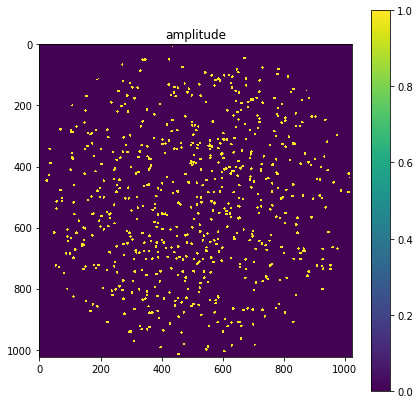

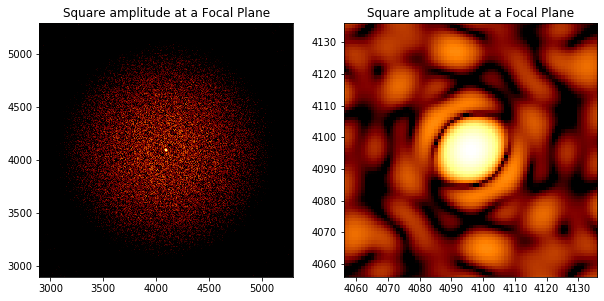

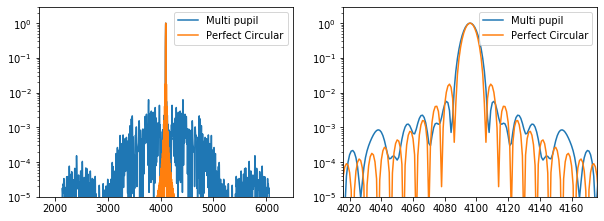

In [3]:
tag="gr"

pupa = pw.wg_plain_wave(n,pos_star)
Nw=30
dl=1/(Nw+1)
dlt=1/(2*Nw+1)
ff=0.3
maskr=mc.p2pm_circular(pupa,[(np.random.normal(0.5,ff,Nw*Nw)*(Nw+1))*dl*n,(np.random.normal(0.5,ff,Nw*Nw)*(Nw+1))*dl*n],n/4*dlt)
pupa[maskr]=0.0+0.0j
masku=mc.p2pm_circular(pupa)
mask=maskr | masku
pupa[mask]=0.0+0.0j

plt_mp.plotpup(pupa,filename="pup_"+tag+".png")
exprat=8 #oversampling factor at a focal plane
foca = nc.cf_no_coronagraph(pupa,exprat=exprat)
plt_mp.plotfoc2D(foca,exprat,filename="foc2d_"+tag+".png")
plt_mp.plotfoc1D(foca,foca_perfect,exprat,filename="foc1d_"+tag+".png")